# Algoritma Genetika Untuk Klastering

## Pseudocode Algoritma Genetika
**START** <br>
Membentuk kromosom <br>
mendefinisikan fungsi fitnes <br>
Membentuk populasi awal ($n$ kromosom) <br>
Menentukan $p_c$, $p_m$, dan $N$ <br>
**for** $i=1$ **to** $N$ <br>
$\hspace{1cm}$ **for** $j=1$ **to** $n$ <br>
$\hspace{2cm}$ **Seleksi** <br>
$\hspace{2cm}$ **Crossover** <br>
$\hspace{2cm}$ **Mutasi** <br>
$\hspace{1cm}$ **end for** <br>
$\hspace{1cm}$ Gabung semua kromosom <br>
$\hspace{1cm}$ Pilih $n$ kromosom terbaik (populasi baru) <br>
**end for** <br>
**STOP**

## Ide Penyelesaian
Secara garis besar, ide untuk menyelesaikan proses klastering adalah
1. Menentukan jarak setiap titik yang ada
2. Mencari titik klaster sebanyak jumlah klaster yang di inginkan, titik klaster adalah titik yang memiliki total jarak jarak yang paling kecil jika di ukur ke titik-titik lainnya
3. Proses penentuan titik-titik klaster menggunakan Algoritma Genetika
4. Memprediksi klaster setiap titik yang ada dengan cara mengukur jarak titik tersebut ke titik-titik klaster, penggolongan klaster ditentukan dengan meninjau jarak yang paling dekat dengan titik klaster

## Penjelasan Program dengan Metode Algoritma Genetika
#### 1. Kromosom
Kromosom adalah suatu baris yang berisikan titik-titik klaster, titik klaster disimbolkan dengan index dari titik-titik pada data yang ada. Misalkan data tersebut memiiki 10 titik yaitu
$$ (0,4),(1,7),(2,9),(3,5),(4,4),(5,3),(3,6),(4,8),(2,5),(1,6)\\ $$
asumsikan titik klasternya adalah $(4,4),(1,7),$ dan $(4,8)$, maka kromosomnya adalah $4\;1\;7$.
#### 2. Populasi
Populasi adalah kumpulan kromosom-kromosom. Misalkan terdapat 3 populasi, maka akan terbentuk populasi seperti berikut:
$$\begin{align*}
4\;1\;7\\
8\;0\;1\\
0\;3\;6
\end{align*}$$
#### 3. Fungsi Fitness
Fungsi fitnesnya adalah total jarak pada setiap klaster ke titik-titik lainnya. Pada kasus ini jarak yang digunakan adalah hasil pembulatan, sehingga untuk titik klaster pada index ke $4$ yaitu $(4,4)$, jarak terhadap titik-titik lainnya akan terbentuk array yaitu $[4\;4\;5\;1\;0\;1\;2\;4\;2\;3]$.

Dalam hal ini index pertama adalah jarak titik $(4,4)$ ke titik $(0,4)$, index kedua adalah jarak titik $(4,4)$ ke titik $(1,7)$, dst. Total jarak pada klaster tersebut adalah $26$. Dengan cara yang sama untuk titik klaster pada index ke $1$ dan $7$ akan menghasilkan total jarak yaitu $24$ dan $30$. Jadi total jarak pada semua klaster adalah $80$.

Sehingga jika populasi berserta fitnessnya dikemas dalam bentuk dataframe, maka akan berbentuk sebagai berikut:

|.|0|1|2|fitness|
|-|-|-|-|-|
|0|4|1|7|80|
|1|8|0|1|75|
|2|0|3|6|70|

#### 4. Crossover
Crossover yang digunakan adalah dengan memilih dua kromosom secara acak, lalu pada kromosom yang pertama, dipilih satu titik klaster secara acak dan menaruh posisi beserta titik klaster tersebut pada kromosom lainnya. Jika pada kromosom lainnya sudah terdapat titik klaster yang dipilih, maka titik klaster pada kromosom itu dibuang dan ditambahkan titik klaster pada posisi yang sesuai. Untuk titik klaster selain yang dipilih akan bergeser kekanan.

Contoh: jika memilih kromosom index ke-1 dan ke-2 pada populasi, yaitu $8\;0\;1$ dan $0\;3\;6$, serta memilih titik klaster index ke-2 pada kromosom 2 dan menaruhnya ke kromosom satu maka akan diperoleh hasil crossover $8\;3\;1$.

Secara keseluruhan contoh hasil crossovernya adalah sebagai berikut:

|.|0|1|2|fitness|
|-|-|-|-|-|
|0|8|3|1|62|
|1|8|3|1|62|
|2|4|0|7|88|

#### 5. Mutasi
Mutasi yang digunakan adalah dengan mengurangkan setiap titik klaster dengan satu, jika titik klasternya 0 maka akan diganti dengan titik klaster tertinggi pada kromosom tersebut.

Contoh: jika memilih kromosom index ke-2 pada populasi hasil mutasi, yaitu $4\;0\;7$, maka hasil mutasinya adalah $3\;7\;6$.

Secara keseluruhan contoh hasil mutasinya adalah sebagai berikut:

|.|0|1|2|fitness|
|-|-|-|-|-|
|0|7|2|0|96|
|1|7|2|0|96|
|2|3|7|6|68|

#### 6. Penggabungan dan Seleksi
Setiap hasil populasi, crossover, dan mutasi dijadikan satu, lalu diseleksi berdasarkan jumlah fitness terkecil. Pada proses ini juga menghilangkan kromosom yang duplikat dan hasil akhirnya digunakan sebagai populasi yang baru.

Contoh hasil kombinasi dan selesi adalah sebagai berikut:

|.|0|1|2|fitness|
|-|-|-|-|-|
|0|8|3|1|62|
|1|3|7|6|68|
|2|0|3|6|70|

#### 7. Prediksi
Untuk memprediksi suatu titik termasuk klaster yang mana, caranya adalah dengan meninjau titik tersebut paling dekat dengan titik klaster yang mana. Sehingga, jika populasi hasil kombinasi sebelumnya diasumsikan sebagai populasi paling bagus, maka index ke-0 merupakan kromosom yang berisikan titik-titik klaster yang digunakan sebagai prediksi.

Oleh karena itu titik-titik
$$ (0,4),(1,7),(2,9),(3,5),(4,4),(5,3),(3,6),(4,8),(2,5),(1,6)\\ $$
jika dilakukan prediksi klaster, maka akan menghasilkan list klaster yaitu

$$ 0, 2, 2, 1, 1, 1, 0, 0, 0, 0 $$

#### 8. Ploting
Setiap titik-titk pada data tersebut akan diploting berdasarkan hasil klaster yang telah diprediksi

## Implementasi Algoritma

##### 1. Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### 2. Fungsi menghitung jarak tiap titik

In [2]:
def Distance(x, y):
    dist = np.array([np.sqrt((x[i] - x)**2 + (y[i] - y)**2) for i in range(len(x))], dtype=int)
    
    return dist

##### 3. Fungsi fitness

In [3]:
def Fitness(p, dist):
    popFit = p.copy()
    popFit["fitness"] = [sum(list(map(lambda x: sum(dist[x]), p.iloc[i,:-1]))) for i in range(len(p))]
    
    return popFit

##### 4. Fungsi membuat populasi awal

In [4]:
def CreatePopulation(n_chrom, cluster, n_point, dist):
    arr_pop = np.array([np.random.permutation(n_point)[:cluster] for i in range(n_chrom)])
    pop = pd.DataFrame(arr_pop)
    
    pop["fitness"] = 0
    pop = Fitness(pop, dist)
    
    return pop

##### 5. Fungsi crossover

In [5]:
def Crossover(pop, dist):
    n = len(pop)
    m = len(pop.keys()) - 1
    popc = pop.copy()
    
    for i in range(n):
        n1, n2 = np.random.permutation(n)[:2]
        idx = np.random.randint(0,m)
        
        temp1 = list(pop.iloc[n1,:-1])
        temp2 = list(pop.iloc[n2,:-1])
        
        if temp1[idx] in temp2:
            temp2.remove(temp1[idx])
            temp2.insert(idx,temp1[idx])
        else:
            temp2[idx] = temp1[idx]
        temp2.append(pop.iloc[n2,-1])
        
        popc.loc[i] = temp2
    
    popc = Fitness(popc, dist)
    
    return popc

##### 6. Fungsi mutasi

In [6]:
def Mutation(popc, dist):
    n = len(popc)
    m = len(popc.keys()) - 1
    popm = popc.copy()
    
    for i in range(n):
        temp = list(map(lambda x: x-1 if x!=0 else max(popc.iloc[i,:-1]), popc.iloc[i,:-1]))
        temp.append(popc.iloc[i,-1])
        popm.loc[i] = temp
    
    popm = Fitness(popm, dist)
    
    return popm

##### 7. Fungsi penggabungan dan seleksi

In [7]:
def CombineAndSelection(pop, popc, popm):
    n = len(pop)
    
    popAll = pop.copy()
    popAll = popAll.append(popc, ignore_index=True)
    popAll = popAll.append(popm, ignore_index=True)
    
    popAll = popAll.sort_values(by=['fitness'])
    popAll.index = range(len(popAll))
    
    popAll = popAll.drop_duplicates()
    popAll = popAll.head(n)
    
    return popAll

##### 8. Fungsi prediksi

In [8]:
def PredictCluster(chrom, n_point, dist):
    arr_index = np.arange(0, n_point)
    list_cluster = [np.array(list(map(lambda x: dist[x,idx], chrom))).argmin() for idx in arr_index]
    
    return list_cluster

##### 9. Plotting

In [9]:
def PlotSolution(x, y, cluster, Title=""):
    arr_index = np.arange(0, len(x))
    plt.figure(figsize=(10,5))
    sns.scatterplot(x, y , hue=cluster, style=cluster, s=150, palette="Set1", legend="full")
    
    plt.legend(title="Klaster")
    plt.title(Title)
    plt.show()

##### 10. Fungsi utama

In [10]:
def SolveClusteringGeneticAlgorithm(x, y, n_chrom=10, cluster=2, p_cross=1, p_mut=1, 
                                    max_generate=10, plot_step=False, step=1):
    
    dist = Distance(x, y)
    
    pop = CreatePopulation(n_chrom, cluster, len(x), dist)
    print('Titik klaster pada populasi awal')
    print(pop.head(1))
    PlotSolution(x, y, np.zeros(len(x), dtype=int), Title="Ploting Data Sebelum Klastering")
    print()

    for i in range(max_generate):
        pc = np.random.rand()
        pm = np.random.rand()

        popc = pop.copy()
        popm = pop.copy()

        if pc < p_cross:
            popc = Crossover(pop, dist)
            
        if pm < p_mut:
            popm = Mutation(popc, dist)
            
        pop = CombineAndSelection(pop, popc, popm)
        
        if plot_step and i%step==0:
            print('Titik klaster pada generasi ke',i)
            print(pop.head(1))
            list_cluster = PredictCluster(pop.iloc[0,:-1], len(x), dist)
            PlotSolution(x, y, list_cluster, Title="Ploting Data Proses Klastering")
            
    print()
    print('Titik klaster terbaik pada populasi akhir')
    print(pop.head(1))
    list_cluster = PredictCluster(pop.iloc[0,:-1], len(x), dist)
    PlotSolution(x, y, list_cluster, Title="Ploting Data Sesudah Klastering")

### Contoh 1
Klastering 16 titik, dimana
1. Jumlah populasi 10
2. Jumlah klaster 4
3. Jumlah generasi 15
4. Pasti terjadi crossover dan mutasi 
5. Ploting proses setiap 4 generasi

#### Titik-titik pada contoh 1

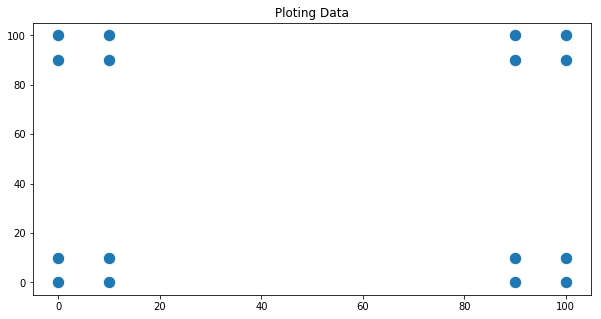

In [11]:
x = np.array([0, 10, 10, 0, 100, 100, 90, 90, 100, 100, 90, 90, 0, 0, 10, 10])
y = np.array([0, 0, 10, 10, 100, 90, 100, 90, 0, 10, 0, 10, 90, 100, 90, 100])

plt.figure(figsize=(10,5))
sns.scatterplot(x, y, s=150, palette="Set1")
plt.title("Ploting Data")
plt.show()

#### Solusi contoh 1

Titik klaster pada populasi awal
    0   1   2   3  fitness
0  13  11  14  10     4981


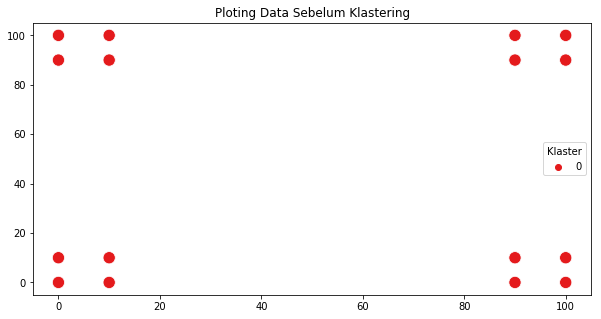


Titik klaster pada generasi ke 0
    0   1  2  3  fitness
0  11  14  7  9     4845


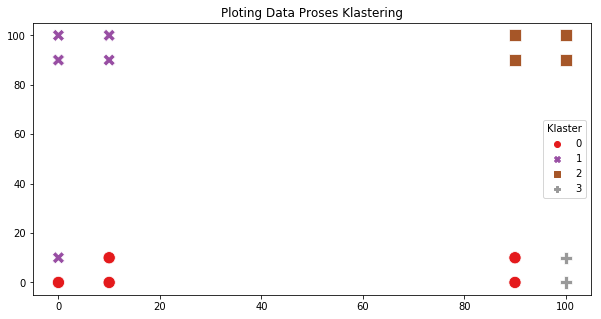

Titik klaster pada generasi ke 4
    0   1  2  3  fitness
0  11  14  7  9     4845


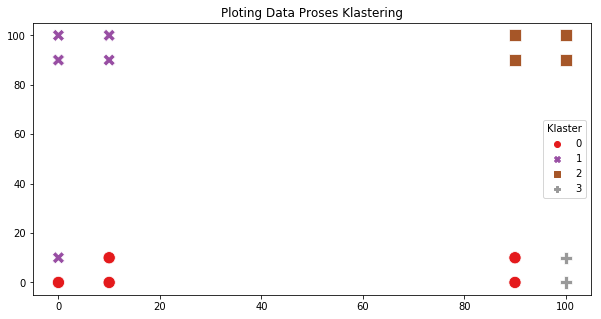

Titik klaster pada generasi ke 8
    0  1  2   3  fitness
0  11  7  2  14     4776


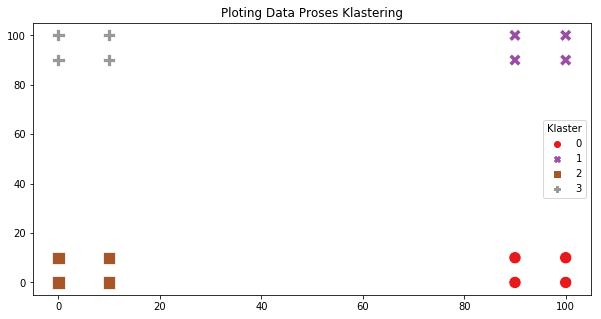

Titik klaster pada generasi ke 12
    0  1  2   3  fitness
0  11  7  2  14     4776


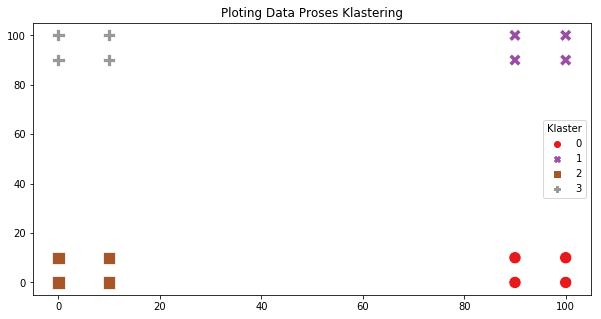


Titik klaster terbaik pada populasi akhir
    0  1  2   3  fitness
0  11  7  2  14     4776


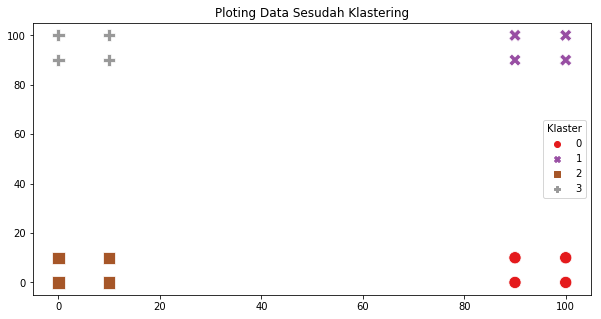

In [12]:
SolveClusteringGeneticAlgorithm(x, y, n_chrom=10, cluster=4, max_generate=15, plot_step=True, step=4)

### Contoh 2
Klastering 150 titik, dimana
1. Jumlah populasi 20
2. Jumlah klaster 3
3. Jumlah generasi 100
4. Peluang terjadinya crossover dan mutasi adalah 0.95 dan 0.9 
5. Ploting awal dan akhir populasi

#### Titik-titik pada contoh 2

In [13]:
x = np.random.random(150)*100
y = np.random.random(150)*100

#### Solusi contoh 2

Titik klaster pada populasi awal
    0   1   2  fitness
0  50  29  58    26712


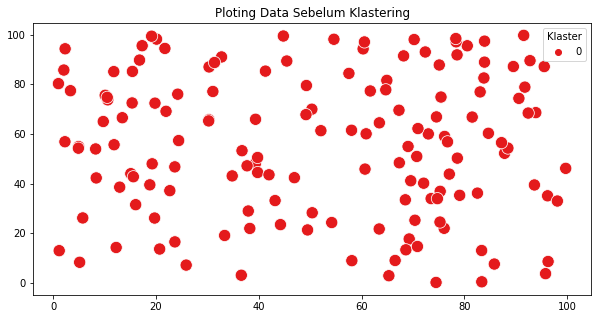



Titik klaster terbaik pada populasi akhir
    0  1   2  fitness
0  28  9  12    17472


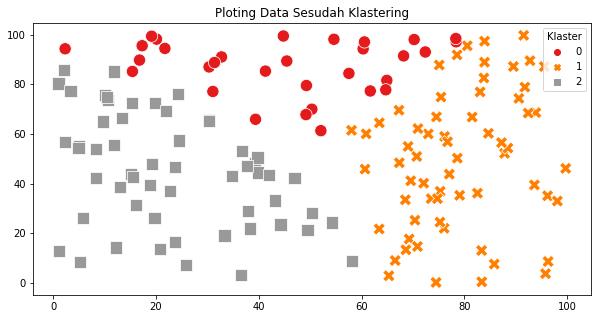

In [14]:
SolveClusteringGeneticAlgorithm(x, y, n_chrom=20, cluster=3,
                                p_cross=0.95, p_mut=0.9, max_generate=100, plot_step=False)